# Retail Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from datetime import datetime

In [3]:
df = pd.read_csv("D:\Data set\online+retail\Online Retail.csv",encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [5]:
df.shape

(541909, 8)

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We have null values in description and customerID columns.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


The Quantity and Unitprice columns have negative values which is irrelevent.

In [10]:
df["Country"].nunique()

38

In [11]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [21]:
df1 = df[['InvoiceNo','Country']]
df1.head()

,InvoiceNo,Country
0,536365,United Kingdom
1,536365,United Kingdom
2,536365,United Kingdom
3,536365,United Kingdom
4,536365,United Kingdom


In [22]:
customers= df1.drop_duplicates(subset='InvoiceNo')
print(customers)

       InvoiceNo         Country
0         536365  United Kingdom
7         536366  United Kingdom
9         536367  United Kingdom
21        536368  United Kingdom
25        536369  United Kingdom
...          ...             ...
541865    581583  United Kingdom
541867    581584  United Kingdom
541869    581585  United Kingdom
541890    581586  United Kingdom
541894    581587          France

[25900 rows x 2 columns]


In [27]:
len(customers)

25900

<Axes: xlabel='Country', ylabel='count'>

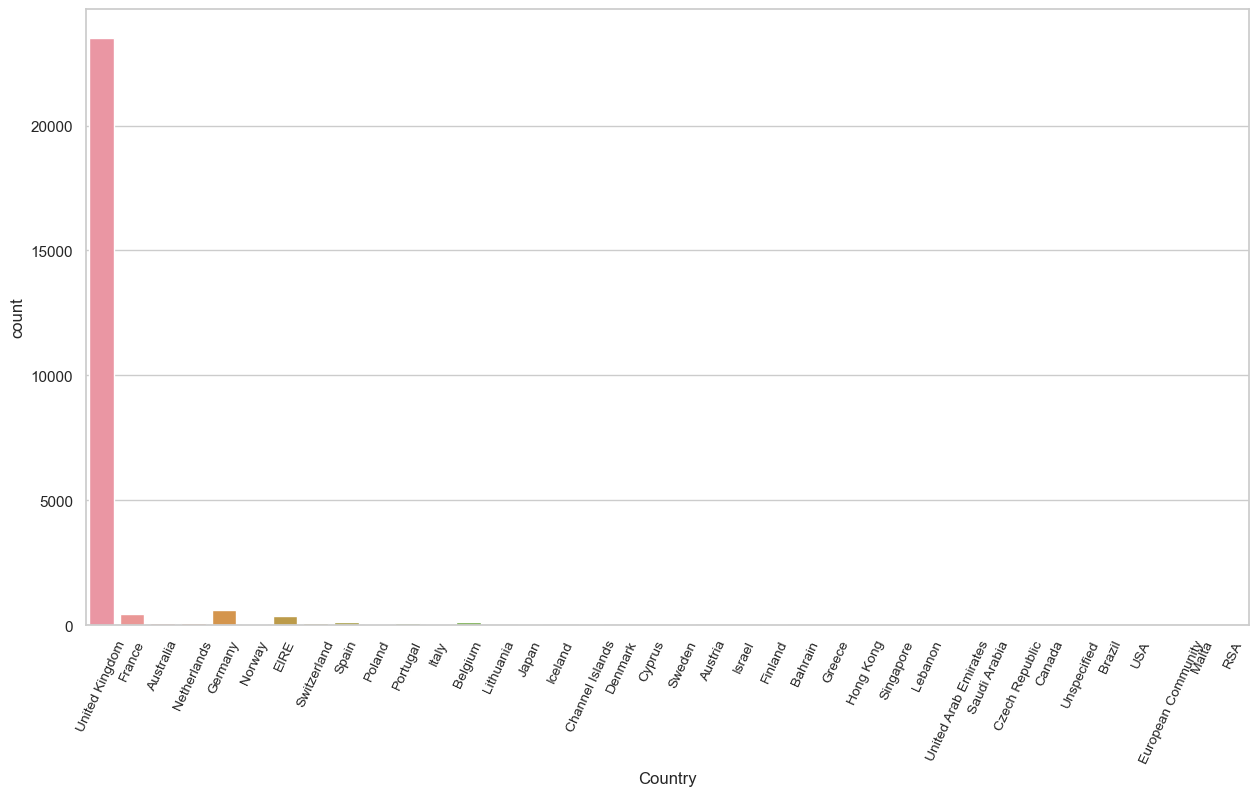

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize = (15,8))
plt.xticks(rotation=65,size=10)
sns.countplot(x='Country',data=customers)

In [31]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print(f"Transactions are registered from {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Transactions are registered from 2010-01-12 08:26:00 to 2011-12-10 17:19:00


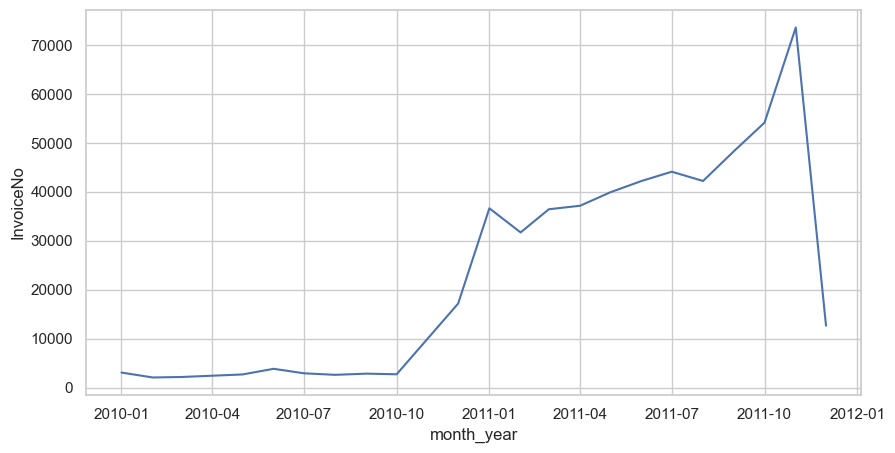

In [32]:
df['month']=df['InvoiceDate'].dt.month
df['year']=df['InvoiceDate'].dt.year
df['month_year']=pd.to_datetime(df[['year', 'month']].assign(Day=1))
df['TotalPrice']=df['Quantity']*df['UnitPrice']


sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
plot = pd.DataFrame(df.groupby(['month_year'])['InvoiceNo'].count()).reset_index()
ax= sns.lineplot(x="month_year",y ="InvoiceNo",data=plot )

According to our data the no. of transactions had increased from october 2010

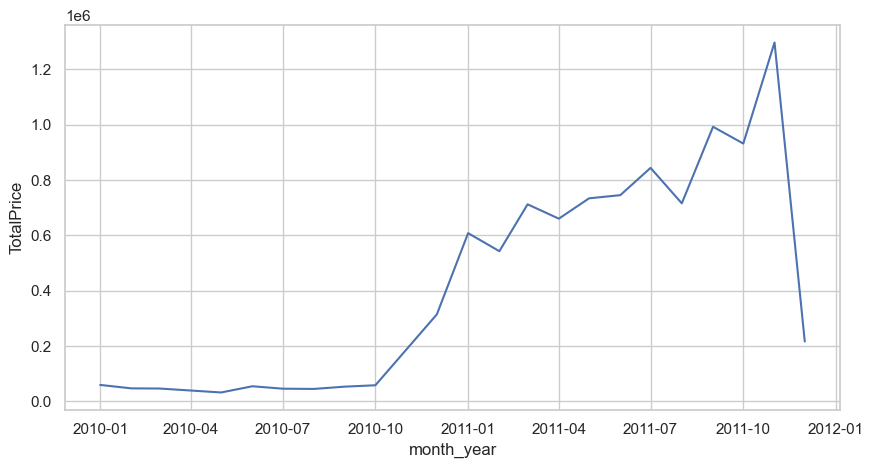

In [33]:
data2 = pd.DataFrame(df.groupby(['month_year'])['TotalPrice'].sum()).reset_index()
plt.figure(figsize=(10,5))
ax=sns.lineplot(x='month_year',y='TotalPrice',data=data2)

The revenue also increased from october 2010

#### Dropping of cancelled orders

In [34]:
cancelled_orders =df[df["InvoiceNo"].astype(str).str.startswith("C")]
cancelled_orders

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,month_year,TotalPrice
141,C536379,D,Discount,-1,2010-01-12 09:41:00,27.50,14527.0,United Kingdom,1,2010,2010-01-01,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-01-12 09:49:00,4.65,15311.0,United Kingdom,1,2010,2010-01-01,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-01-12 10:24:00,1.65,17548.0,United Kingdom,1,2010,2010-01-01,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,1,2010,2010-01-01,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-01-12 10:24:00,0.29,17548.0,United Kingdom,1,2010,2010-01-01,-6.96
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-09-12 09:57:00,0.83,14397.0,United Kingdom,9,2011,2011-09-01,-9.13
541541,C581499,M,Manual,-1,2011-09-12 10:28:00,224.69,15498.0,United Kingdom,9,2011,2011-09-01,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-09-12 11:57:00,10.95,15311.0,United Kingdom,9,2011,2011-09-01,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-09-12 11:58:00,1.25,17315.0,United Kingdom,9,2011,2011-09-01,-1.25


In [35]:
len(cancelled_orders)

9288

In [36]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
df.shape

(532621, 12)

____

Lets consider the values which dont have customerID as unknown customers. The scatter plot shows the buying tendency of customers who has customerID and without customerID.

In [37]:
df_inv = df.dropna().groupby("InvoiceNo").agg({"TotalPrice": "sum", "Quantity":"sum"})
df_inv_na = df[df["CustomerID"].isnull()].groupby("InvoiceNo").agg({"TotalPrice": "sum", "Quantity":"sum"})

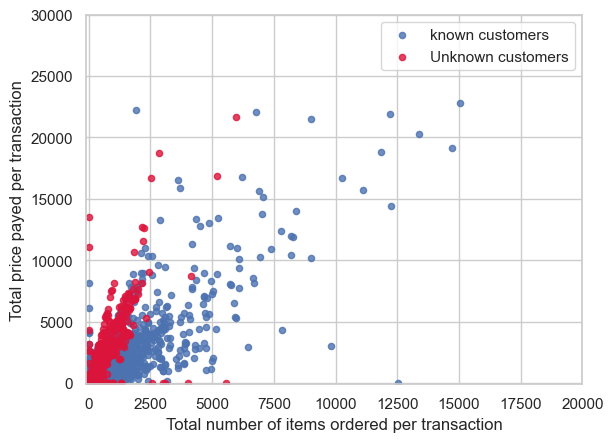

In [38]:
ax = df_inv.plot(kind="scatter", x="Quantity", y="TotalPrice", alpha=0.8, label="known customers")
df_inv_na.plot(kind="scatter", x="Quantity", y="TotalPrice", ax=ax, color="crimson", alpha=0.8, label="Unknown customers")
ax.set_ylim(-100, 30000)
ax.set_xlim(-100, 20000)
ax.set_ylabel("Total price payed per transaction")
ax.set_xlabel("Total number of items ordered per transaction")
_ = ax.legend()

The above scatter plot shows that the known customers bought more items per transcaction compared to the unknown customers. But the unknown customers bought costlier items than known customers.